# Linear Regression

Regression problems pop up whenever we want to predict a numerical value. Common examples include predicting prices (of homes, stocks, etc.), predicting the length of stay (for patients in the hospital), forecasting demand (for retail sales), among countless others. Not every prediction problem is a classic regression problem. Later on, we will introduce classification problems, where the goal is to predict membership among a set of categories.

As a running example, suppose that we wish to estimate the prices of houses (in dollars) based on their area (in square feet) and age (in years). To develop a model for predicting house prices, we need to get our hands on data consisting of sales, including the sales price, area, and age for each home. In the terminology of machine learning, the dataset is called a training dataset or training set, and each row (containing the data corresponding to one sale) is called an example (or data point, instance, sample). The thing we are trying to predict (price) is called a label (or target). The variables (age and area) upon which the predictions are based are called features (or covariates).

## Vectorization for Speed

When training our models, we typically want to process whole minibatches of examples simultaneously. Doing this efficiently requires that we vectorize the calculations and leverage fast linear algebra libraries rather than writing costly for-loops in Julia.

To illustrate why this matters so much, we can consider two methods for adding vectors. To start, we instantiate two 10,000-dimensional vectors containing all ones. In one method, we loop over the vectors with a Julia for-loop. In the other method, we rely on a single call to +.

In [1]:
n = 10000
a = ones(n)
b = ones(n);

Now we can benchmark the workloads. First, we add them, one coordinate at a time, using a for-loop.

In [2]:
using IterTools
@time c = [ae+be for (ae,be) in zip(a,b)];

  0.059799 seconds (151.57 k allocations: 10.468 MiB, 87.87% compilation time)


Alternatively, we rely on the reloaded + operator to compute the elementwise sum.

In [3]:
@time d = a.+b;

  0.054534 seconds (98.36 k allocations: 6.826 MiB, 99.52% compilation time)


The second method is dramatically faster than the first. Vectorizing code often yields order-of-magnitude speedups. Moreover, we push more of the mathematics to the library without the need to write as many calculations ourselves, reducing the potential for errors and increasing portability of the code.

## The Normal Distribution and Squared Loss

We can now visualize the normal distributions.

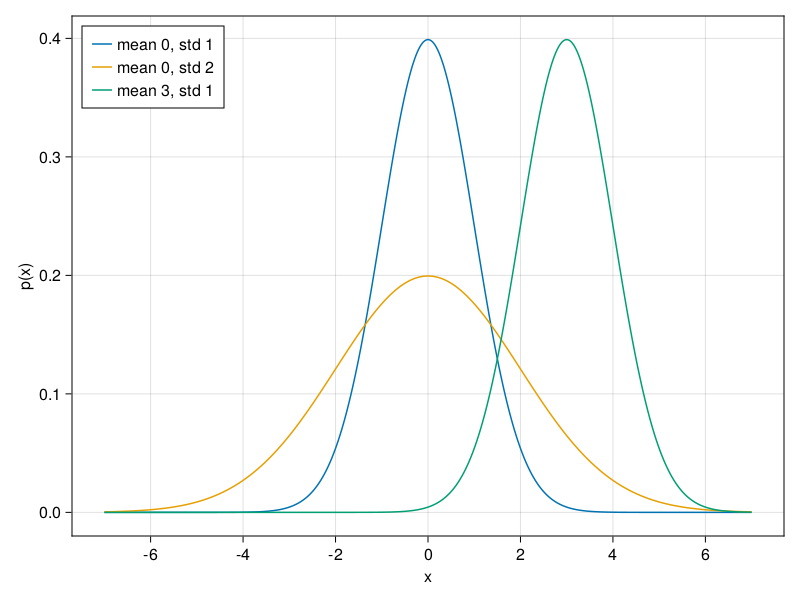

In [4]:
using Distributions
using CairoMakie

x = -7:0.01:7
# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]

f = Figure()
ax = Axis(f[1, 1], xlabel = "x", ylabel = "p(x)",xticks = -6:2:6)
for p in params
    μ,σ = p[1],p[2]
    lines!(x, Normal(μ,σ), label="mean $(μ), std $(σ)")
end
axislegend(position = :lt)
f